In [1]:
kk 0

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^!kk0:起始>^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


## 符号运算

In [2]:
from sympy import *
init_printing()

In [3]:
x, y, z = symbols("x, y, z")
a, b = symbols("a, b")
f = Function("f")

### 表达式变换和化简

simplify(): 对数学表达式进行化简

In [4]:
simplify((x + 2) ** 2 - (x + 1) ** 2)

radsimp(): 对表达式的分母进行有理化

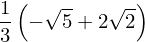

In [5]:
radsimp(1 / (sqrt(5) + 2 * sqrt(2)))

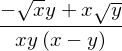

In [6]:
radsimp(1 / (y * sqrt(x) + x * sqrt(y)))

 ratsimp(): 分母通分运算

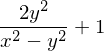

In [7]:
ratsimp(x / (x + y) + y / (x - y))

fraction(): 包含分子与分母的元组

In [8]:
fraction(ratsimp(1 / x + 1 / y))

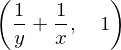

In [9]:
# fraction默认情况下不会对表达式进行通分运算
fraction(1 / x + 1 / y)

cancel(): 对分子分母进行约分运算

In [10]:
cancel((x ** 2 - 1) / (1 + x))

apart(): 部分分式分解

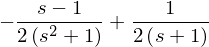

In [11]:
s = symbols("s")
trans_func = 1/(s**3 + s**2 + s + 1)
apart(trans_func)

trigsimp(): 三角函数化简, `method`参数可以选择化简算法

In [12]:
trigsimp(sin(x) ** 2 + 2 * sin(x) * cos(x) + cos(x) ** 2)

expand_trig(): 展开三角函数表达式

In [13]:
expand_trig(sin(2 * x + y))

**expand()**包含的二级函数:  
expand_complex(),  expand_func(),  expand_log(),  expand_mul(),  expand_multinomial(),  expand_power_base(),  expand_power_exp(),  expand_trig(),  hyperexpand()

In [14]:
# expand()的标志参数一: 默认为正
from sympy import *
from tabulate import tabulate
from IPython.display import Markdown, display_markdown
x,y,z = symbols("x y z",positive = True)

flags = ["mul", "log", "multinomial", "power_base", "power_exp"]
expressions = [x*(y+z), log(x*y**2), (x+y)**2, (x*y)**2, exp(x+y)]
infos =["分解因式", "对数函数分解", 
        "多项式标准化", "将幂函数按底数分解", "将幂函数按指数分解"]
table = []
for flag, expression, info in zip(flags, expressions, infos):
    table.append(["`{}`".format(flag), "`expand({})`".format(expression), "${}$".format(latex(expand(expression))), info])
table_md = tabulate(table, ["标志", "表达式", "结果", "说明"], "pipe") #pipe: markdown形式
display_markdown(Markdown(table_md)) 

| 标志          | 表达式                | 结果                                                  | 说明               |
|:--------------|:----------------------|:------------------------------------------------------|:-------------------|
| `mul`         | `expand(x*(y + z))`   | $x y + x z$                                           | 分解因式           |
| `log`         | `expand(log(x*y**2))` | $\log{\left (x \right )} + 2 \log{\left (y \right )}$ | 对数函数分解       |
| `multinomial` | `expand((x + y)**2)`  | $x^{2} + 2 x y + y^{2}$                               | 多项式标准化       |
| `power_base`  | `expand(x**2*y**2)`   | $x^{2} y^{2}$                                         | 将幂函数按底数分解 |
| `power_exp`   | `expand(exp(x + y))`  | $e^{x} e^{y}$                                         | 将幂函数按指数分解 |

In [15]:
# 不展开特定类型的表达式
x, y, z = symbols("x,y,z", positive=True)
expand(x * log(y * z), mul=0)

In [16]:
# expand()的标志参数二: 默认为False
from tabulate import tabulate
from IPython.display import Markdown
flags = ["complex", "func", "trig"]
expressions = [x * y, gamma(1 + x), sin(x + y)]
infos =["展开复数", "对一些特殊的函数进行展开", "三角函数展开"]
table = []
for flag, expression, info in zip(flags, expressions, infos):
    table.append(["`{}`".format(flag), 
                  "`expand({})`".format(expression), 
                  "${}$".format(latex(expand(expression))),
                 info])

display_markdown(Markdown(tabulate(table, ["标志", "表达式", "结果", "说明"], "pipe")))

| 标志      | 表达式                 | 结果                          | 说明                     |
|:----------|:-----------------------|:------------------------------|:-------------------------|
| `complex` | `expand(x*y)`          | $x y$                         | 展开复数                 |
| `func`    | `expand(gamma(x + 1))` | $\Gamma{\left(x + 1 \right)}$ | 对一些特殊的函数进行展开 |
| `trig`    | `expand(sin(x + y))`   | $\sin{\left (x + y \right )}$ | 三角函数展开             |

In [17]:
# complex=True: 展开复数的实部和虚部
x, y = symbols("x,y", complex=True)
expand(x * y, complex=True)

In [18]:
# func=True: 对一些特殊函数进行展开
expand(gamma(1 + x), func=True)

In [19]:
# trig=True: 展开三角函数
expand(sin(x + y), trig=True)

factor(): 对多项式表达式进行因式分解

In [20]:
factor(15 * x ** 2 + 2 * y - 3 * x - 10 * x * y)

collect(): 合并同类项

In [21]:
eq = (1 + a * x) ** 3 + (1 + b * x) ** 2
eq2 = expand(eq)
collect(eq2, x)

In [22]:
# evaluate为False时返回一个字典: {x的幂: 系数}, 常数的键为S(1)
p = collect(eq2, x, evaluate=False)
%C p[S(1)]; p[x*1]; p[x**2]; p[x**3]

p[S(1)]    p[x*1]      p[x**2]     p[x**3]
-------  ---------  -------------  -------
2        3*a + 2*b  3*a**2 + b**2  a**3   


In [23]:
# 通过coeff()方法获取系数
%C eq2.coeff(x, 0); eq2.coeff(x, 2)

eq2.coeff(x, 0)  eq2.coeff(x, 2)
---------------  ---------------
2                3*a**2 + b**2  


In [24]:
# 以sin(2x)为焦点合并同类项
collect(a * sin(2 * x) + b * sin(2 * x), sin(2 * x))

### 方程

sympy中的表达式本身就是就是一个值为0的方程, 如果值不为0, 需要用Eq创建;  
使用 solve()求一元二次方程的符号解(单变量方程的解): 一个方程可由多个解, 使用列表保存;

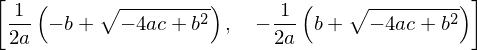

In [25]:
a, b, c = symbols("a,b,c")
solve(a * x ** 2 + b * x + c, x)

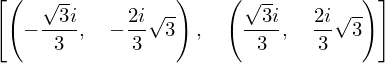

In [26]:
# solve可一次求解多个方程, 返回一个嵌套列表
solve((x ** 2 + x * y + 1, y ** 2 + x * y + 2), x, y)

root(): 可求单变量方程的根, 返回解及其多重性(multiplicities)

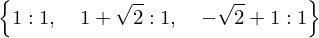

In [27]:
roots(x**3 - 3*x**2 + x + 1)

### 微分

Derivative(): 导函数类, 接收表达式和自变量, 返回一个导函数对象

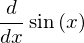

In [28]:
t = Derivative(sin(x), x)
t

In [29]:
# 导函数对象的doit()方法计算导函数的倒数(do it)
t.doit()

直接调用diff()函数或表达式的diff()方法也可以计算导数

In [30]:
diff(sin(2*x), x)

Derivative对象可以表示自定义的数学函数的导数

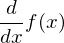

In [31]:
Derivative(f(x), x)

高阶导数

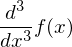

In [32]:
Derivative(f(x), x, x, x) # 也可以写作Derivative(f(x), x, 3)

使用不同的自变量参数创建偏导数函数

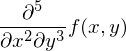

In [33]:
Derivative(f(x, y), x, 2, y, 3)

diff函数的参数和 Derivative的参数相同

In [34]:
diff(sin(x * y), x, 2, y, 3)

### 微分方程

dsolve()对微分方程进行符号求解:  
* 它的第一个参数是带未知函数的表达式;  
* 第二个参数是带求解的未知函数;

In [35]:
x=symbols('x')
f=symbols('f', cls=Function)
dsolve(Derivative(f(x), x) - f(x), f(x))

不同的微分方程需要使用不同的解法, classify_ode()可以查看指定微分方程可选的解法列表;

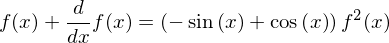

In [36]:
eq = Eq(f(x).diff(x) + f(x), (cos(x) - sin(x)) * f(x)**2)
eq

In [37]:
classify_ode(eq, f(x))

('1st_power_series', 'lie_group')

使用dsolve()的的hint参数指定求解微分方程的算法

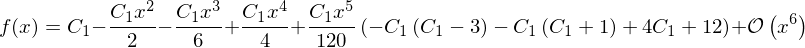

In [38]:
dsolve(eq, f(x), hint='default')

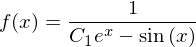

In [39]:
dsolve(eq, f(x), hint="lie_group")

In [40]:
dsolve(eq, f(x), hint="all") #尝试 classify_ode返回的所有解法

{'lie_group': Eq(f(x), 1/(C1*exp(x) - sin(x))),
 '1st_power_series': Eq(f(x), C1 - C1*x**2/2 - C1*x**3/6 + C1*x**4/4 + C1*x**5*(-C1*(C1 - 3) - C1*(C1 + 1) + 4*C1 + 12)/120 + O(x**6)),
 'best': Eq(f(x), 1/(C1*exp(x) - sin(x))),
 'best_hint': 'lie_group',
 'default': '1st_power_series',
 'order': 1}

查看系统支持的所有解法

In [41]:
sym.ode.allhints[:5]

('separable', '1st_exact', '1st_linear', 'Bernoulli', 'Riccati_special_minus2')

### 积分

integrate()既可以计算定积分(definite integration)也可以计算不定积分(indefinite):  
不定积分: integrate(f,x), $\int f{\left (x \right )}\, dx$. 定积分: integrate(f,(x,a,b)), $\int_a^b f{\left (x \right )}\, dx$.  
双重不定积分: integrate(f,x,y);  双重定积分: integrate(f,(x,a,b),(y,c,d));  

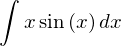

In [42]:
e = Integral(x*sin(x), x)
e    

In [43]:
e.doit()

无法进行符号计算时, 转为数值计算

In [44]:
e2 = Integral(sin(x)/x, (x, 0, 1))
e2.doit()

In [45]:
%P e2.evalf(); e2.evalf(5) # 可以指定精度

 1): 0.946083070367183,     2): 0.94608,    


sympy进行数值积分的问题, 无法正确处理无穷积分

In [46]:
e3 = Integral(sin(x)/x, (x, 0, oo))
e3.evalf()

In [47]:
e3.doit()

In [48]:
kk 2

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$!kk2:终止>$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
